<center><img SRC="oip.jpg"/></center>
<center><h1 style="color:#00FFFF"> Analisis de datos </h1></center>
<center><h4 style="color:#6495ED"> U.Castro Carazo </h4></center>
<center><h6 style="color:#6495ED"> II Cuatrimestre </h6></center>
</br>
</br>
<p>La empresa PK2, especialista en venta de vehiculos usados, desea conocer cual es la distribucion y costo de los autos que tienen actualmente en inventario, para la venta.

La pregunta de negocio para responder es: ¿cual es estrategia podria implementar para generar una mayor rotacionde inventario?
    
El objetivo principal, es poder proponer una estrategia de venta de carros en funcion de los disponibles en el lote actual</p>

<h2 style="color:#5F9EA0">1. Carga y estandarizacion de los archivos de datos </h2> 
<p style="font-weight: bold"> Que se hace en este apartado?</p>
<ol>
<li>Importar las librerias a utilizar(XLSX, CSV, TXT, SQL, ORACLE) </li>
<li>Importar los set de datos </li>
<li>Revisar los nombres de las columnas </li>
<li>si tenemos mas de 1 archivo, vamos a unirlos en un unico datafreame </li>


<h5 style="color:#8A2BE2">1.1 Importar las librerias a utilizar</h5>

In [1]:
#Se realiza las importaciones de las librerias necesarias para el ejerecicio de analisis de datos, sobre los autos disponibles.

import pandas as pd             #para manejo de los datos -DataFrame-
import numpy as np             #para el manejo de estructuras de datos -Listas_
import matplotlib.pyplot as plt #para la creacion de los graficos



<h5 style="color:#008B8B">1.2 Importar el Set de datos</h5>

<h2 style="colo:#5F9EA0"> </h2>La fuente de los datos es la pagina denominada Machine Learning Repository, en esta se puede obtener el nombre de los encabezados del set de datos. 

<h2 style="colo:#5F9EA0"> </h2>Set de datos 

In [2]:
#Se crea una lista con los nombres de las columnas.
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price" ]

#Se cargan los set de datos en la memoria de la PC.
df_autos1 = pd.read_csv("autos1.csv", names = cols)
df_autos2 = pd.read_csv("autos.csv", names = cols)


In [3]:
df_autos1

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
93,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
94,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
95,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<p> Este comando me da el set de datos en filas y columnas<p>

In [4]:
df_autos2.shape


(197, 26)

In [5]:
df_autos1.shape

(97, 26)

<p> Este me permite consultar los nombres de las columnas<p>
<p> Esto es lo primero que se revisa. Es ir conociendo la data. Si son datos numéricos o datos object y revisar que vengan en el mismo orden.<p>

In [6]:
df_autos2.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h4 style="color:#8A2BE2"> Traer los primeros 15 datos</h4>

<h2 style="colo:#5F9EA0"> </h2>Reviso los que salen con signo como el de pregunta. 

In [7]:
df_autos1.head(15)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
9,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


<h4 Style="color:#5F9EA0">1.3 Revisión y validación de las variables</h4>
<p>Este proceso de revision permite identificar variables o datos que deben ser analizados de manera independiente ya que no concuerda con el rango de información a contar<p>
</br>
<p Style="color:#006600">Se requiere como insumo disponer de los Meta Datos</p>

<h4 style="color:#ff0066"> Traer los ultimos 10 datos</h4>

In [8]:
df_autos1.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
87,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
88,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
89,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
90,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
91,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
92,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
93,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
94,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
95,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
96,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


<h4 style="color:#8A2BE2">  Estadística descriptiva de los datos.</h4>

<p> Es para revisar, En la primera fila deben salir los noventa y siete, revisar datos fuera de rango. Se revisa porque la calidad de datos en el set impacta positivamente lo que se genera. Datos buenos resultados buenas.<p>

In [9]:
df_autos1.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,City,Higway
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.855670,98.823711,175.208247,65.872165,54.194845,2587.175258,125.432990,3.388969,3.169381,10.570206,25.185567,30.814433
std,1.314896,5.332170,10.064062,1.655719,2.416755,412.305914,29.560992,0.264412,0.352691,4.373831,5.470241,5.784912
min,-2.000000,89.500000,156.900000,63.400000,49.700000,1918.000000,90.000000,2.540000,2.070000,7.000000,17.000000,22.000000
25%,0.000000,95.700000,168.900000,64.400000,52.500000,2261.000000,98.000000,3.190000,3.030000,9.000000,20.000000,25.000000
50%,0.000000,97.300000,173.500000,65.600000,54.500000,2535.000000,120.000000,3.430000,3.230000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,183.500000,66.600000,56.000000,2975.000000,146.000000,3.620000,3.400000,9.400000,28.000000,34.000000
max,3.000000,114.200000,198.900000,72.300000,59.800000,3485.000000,203.000000,3.940000,3.900000,23.000000,38.000000,47.000000


<h4 style="color:#8A2BE2"> Nos muestra el tipo de dato. </h4>

<p> La información se muestra por columnas y por tipo de dato. Es un resumen de números y caracteres.<p>

In [10]:
df_autos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    97 non-null     int64  
 1   normalized   97 non-null     object 
 2   make         97 non-null     object 
 3   fuel         97 non-null     object 
 4   aspiration   97 non-null     object 
 5   doors        97 non-null     object 
 6   style        97 non-null     object 
 7   wheels       97 non-null     object 
 8   engine       97 non-null     object 
 9   base         97 non-null     float64
 10  length       97 non-null     float64
 11  width        97 non-null     float64
 12  heingt       97 non-null     float64
 13  curb         97 non-null     int64  
 14  engineType   97 non-null     object 
 15  Cylinders    97 non-null     object 
 16  engine-size  97 non-null     int64  
 17  system       97 non-null     object 
 18  bore         97 non-null     float64
 19  stroke    

<h5 style="color:#5F9EA0"> 1.4 Unir set de datos </h2> 

In [11]:
# df_autos1=97 observaciones y 26 columnas
# df_autos2=197 observaciones y 26 columnas
unionArchivos = [df_autos1,df_autos2]
df_autos = pd.concat(unionArchivos)
df_autos.shape

(294, 26)

<h2 style="color:#006400">2. Manejo de valores faltantes</h2>

</ol>
    <li>Identificar como se muestran los valores faltantes y estandarizarlos a NaN</li>
    <li>Contar la cantidad de valores NaN (faltantes)</li>
    <li>Analisis para imputar los valores numericos con la media</li>
    <li>Si tenemos mas de 1 archivo, vamos a unirlos en un unico dataframe</li>
    
 </ol>
<h5 style="color:#CD5C5C">1.1 Importar las librerias a utilizar</h5>
    

In [12]:
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [13]:
df_autos.replace("?",np.nan, inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


<h5 Style="color#8A2BE2">2.2 Contar la cantidad de valores NaN (faltantes)</h5> 

In [14]:
ValoresPerdidos=df_autos.isnull()
ValoresPerdidos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
for column in ValoresPerdidos.columns.values.tolist():
    print(column)
    print(ValoresPerdidos[column].value_counts()) 
    print("")

symboling
False    294
Name: symboling, dtype: int64

normalized
False    237
True      57
Name: normalized, dtype: int64

make
False    294
Name: make, dtype: int64

fuel
False    294
Name: fuel, dtype: int64

aspiration
False    294
Name: aspiration, dtype: int64

doors
False    292
True       2
Name: doors, dtype: int64

style
False    294
Name: style, dtype: int64

wheels
False    294
Name: wheels, dtype: int64

engine
False    294
Name: engine, dtype: int64

base
False    294
Name: base, dtype: int64

length
False    294
Name: length, dtype: int64

width
False    294
Name: width, dtype: int64

heingt
False    294
Name: heingt, dtype: int64

curb
False    294
Name: curb, dtype: int64

engineType
False    294
Name: engineType, dtype: int64

Cylinders
False    294
Name: Cylinders, dtype: int64

engine-size
False    294
Name: engine-size, dtype: int64

system
False    294
Name: system, dtype: int64

bore
False    290
True       4
Name: bore, dtype: int64

stroke
False    290
True     

<h5 Style="color#8A2BE2">2.3 Analisis para imputar los valores numericos con la media.</h5> 

In [16]:
agv_norm = df_autos["normalized"].astype("float").mean(axis=0)
print ("La media de normalizede es:",agv_norm)

La media de normalizede es: 122.26160337552743


In [17]:
df_autos["normalized"].replace(np.nan,122,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [18]:
df_autos["bore"].replace(np.nan,3.94,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [19]:
df_autos["stroke"].replace(np.nan,4.17,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [20]:
df_autos["doors"].replace(np.nan,4,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [21]:
df_autos["horsepower"].replace(np.nan,288,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [22]:
df_autos["peak"].replace(np.nan,6600,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [23]:
df_autos["price"].replace(np.nan,45400,inplace=True)
df_autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


2.4 Analisis para imputar lps valores caracter con el mas frecuente xxxxxxxx

In [24]:
df_autos["doors"].value_counts()

four    167
two     125
4         2
Name: doors, dtype: int64

In [25]:
df_autos["doors"].value_counts().idxmax()

'four'

In [26]:
df_autos["doors"].replace(np.nan,"four",inplace=True)

In [27]:
ValoresPerdidos=df_autos.isnull()
for column in ValoresPerdidos.columns.values.tolist():
    print(column)
    print(ValoresPerdidos[column].value_counts()) 
    print("")

symboling
False    294
Name: symboling, dtype: int64

normalized
False    294
Name: normalized, dtype: int64

make
False    294
Name: make, dtype: int64

fuel
False    294
Name: fuel, dtype: int64

aspiration
False    294
Name: aspiration, dtype: int64

doors
False    294
Name: doors, dtype: int64

style
False    294
Name: style, dtype: int64

wheels
False    294
Name: wheels, dtype: int64

engine
False    294
Name: engine, dtype: int64

base
False    294
Name: base, dtype: int64

length
False    294
Name: length, dtype: int64

width
False    294
Name: width, dtype: int64

heingt
False    294
Name: heingt, dtype: int64

curb
False    294
Name: curb, dtype: int64

engineType
False    294
Name: engineType, dtype: int64

Cylinders
False    294
Name: Cylinders, dtype: int64

engine-size
False    294
Name: engine-size, dtype: int64

system
False    294
Name: system, dtype: int64

bore
False    294
Name: bore, dtype: int64

stroke
False    294
Name: stroke, dtype: int64

compression
False   

2.5 Eliminar filas con valores faltantes xxxx

In [28]:
df_autos.dropna(subset = ("price"), axis=0, inplace=True)
df_autos               

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [29]:
df_autos.reset_index(drop=True, inplace=True)
df_autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
290,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
291,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
292,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h2 style="color:#006400">3. Estandarizacion de los datos</h2>

    Que se hace en este apartado?

</ol>
    <li>1.Se verifica el domonio de la variable y se ajusta, si es necesario</li>
    <li>2.Se convierten los valores en funcion de su interpretacion</li>
    <li>3.Se normalizan los datos para que los valores distintos queden en tre 0 y 1</li>
    <li>4.Binning</li>
    
 </ol>
<h5 style="color:#CD5C5C">3.1 Verificacion del dominio de variables</h5>

In [30]:
#df_autos1.dtypes()

In [31]:
## Esto se realiza para poder estandarizar los tipos de datos del negocio, no es necesario hacerlo siempre, es por
## el ejemplo didactico.
#df_autos.dropna(subset = ("horsepower"), axis=0, inplace=True
#df_autos.dropna(subset = ("normalized"), axis=0, inplace=True  
#df_autos.reset_index(drop=True, inplace=True  
##--------------------------------------------------------------------------##                     
df_autos[['bore','stroke','peak']]=df_autos[['bore','stroke','peak']].astype('float')
df_autos[['price']]=df_autos[['price']].astype('float')
df_autos[['normalized','stroke','peak']]=df_autos[['bore','stroke','peak']].astype('float')

<h5 style="color:#CD5C5C">3.2 Estandarizar valores</h5>

In [32]:
df_autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,3.33,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200.0,27,34,9549.0
1,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200.0,17,22,13499.0
2,0,3.43,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200.0,17,22,14399.0


In [33]:
df_autos["city-L/100km"]= 235/df_autos["City"]
df_autos["highway-L/100km"]= 235/df_autos["Higway"]
df_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km
0,0,3.33,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.33,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765
1,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818
2,0,3.43,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818
3,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000
4,3,3.43,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.43,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000


<h5 style="color:#CD5C5C">3.3 Normalizar valores</h5>


In [34]:
dfTemp = df_autos[["length", 'width', 'heingt']]
dfTemp

,length,width,heingt
0,173.4,65.2,54.7
1,181.7,66.5,55.1
2,184.6,66.5,56.1
3,184.6,66.5,55.1
4,170.7,67.9,49.7
...,...,...,...
289,180.2,66.9,55.1
290,183.1,66.9,55.1
291,188.8,67.2,56.2
292,188.8,67.2,57.5


In [35]:
df_autos["length"] = df_autos['length']/df_autos['length'].max()
df_autos["width"] = df_autos['width']/df_autos['width'].max()
df_autos["heingt"] = df_autos['heingt']/df_autos['heingt'].max()

In [36]:
dfTemp = df_autos[["length", 'width', 'heingt']]
dfTemp

,length,width,heingt
0,0.833253,0.901798,0.914716
1,0.873138,0.919779,0.921405
2,0.887074,0.919779,0.938127
3,0.887074,0.919779,0.921405
4,0.820279,0.939142,0.831104
...,...,...,...
289,0.865930,0.925311,0.921405
290,0.879865,0.925311,0.921405
291,0.907256,0.929461,0.939799
292,0.907256,0.929461,0.961538


<h5 style="color:#CD5C5C">3.4 Binning</h5>


In [37]:
df_autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km
0,0,3.33,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.33,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765
1,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818
2,0,3.43,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818
3,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000
4,3,3.43,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.43,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0,3.01,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,3.01,3.40,23.0,68,4500.0,33,38,13845.0,7.121212,6.184211
290,0,3.19,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,3.19,3.40,9.0,88,5500.0,25,31,12290.0,9.400000,7.580645
291,-2,3.78,volvo,gas,std,four,sedan,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,8.392857
292,-1,3.78,volvo,gas,std,four,wagon,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,8.392857


In [38]:
df_autos.dtypes

symboling            int64
normalized         float64
make                object
fuel                object
aspiration          object
doors               object
style               object
wheels              object
engine              object
base               float64
length             float64
width              float64
heingt             float64
curb                 int64
engineType          object
Cylinders           object
engine-size          int64
system              object
bore               float64
stroke             float64
compression        float64
horsepower          object
peak               float64
City                 int64
Higway               int64
price              float64
city-L/100km       float64
highway-L/100km    float64
dtype: object

In [39]:
df_autos[["horsepower"]]=df_autos[["horsepower"]].astype(int)


In [40]:
bins = np.linspace(min(df_autos["horsepower"]), max(df_autos["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [41]:
nombre= ["pequeno", "mediano",  "grande"]
df_autos["horsepower-bins"] = pd.cut(df_autos["horsepower"], bins, labels=nombre, include_lowest=True)

In [42]:
df_autos[["horsepower-bins"]].value_counts()

horsepower-bins
pequeno            233
mediano             54
grande               7
dtype: int64

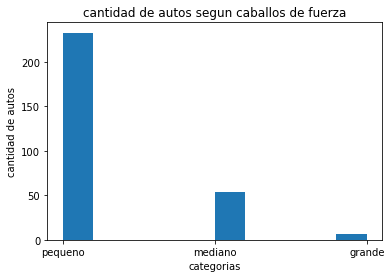

In [43]:
plt.hist(df_autos["horsepower-bins"])
plt.xlabel("categorias")
plt.ylabel("cantidad de autos")
plt.title("cantidad de autos segun caballos de fuerza")
plt.show()

In [44]:
df_autos.head(5)


,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km,horsepower-bins
0,0,3.33,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeno
1,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,mediano
2,0,3.43,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,mediano
3,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,mediano
4,3,3.43,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,mediano


In [45]:
#Agrupar las observaciones segun marca de vehiculo.
gf1 = df_autos.groupby(['make']).count()
gf1

,symboling,normalized,fuel,aspiration,doors,style,wheels,engine,base,length,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km,horsepower-bins
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
jaguar,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
mazda,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [46]:
gf1 = df_autos.groupby(['make']).count()
gf1 =gf1.loc[:,'fuel']
gf1


make
alfa-romero       3
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan           25
peugot           22
plymouth         14
porsche          10
renault           4
saab             12
subaru           24
toyota           64
volkswagen       24
volvo             6
Name: fuel, dtype: int64

In [47]:
gf1 = df_autos.groupby(['make']).count()
gf1 =gf1.iloc[:,:1]
gf1 =gf1.rename(columns={'make':'marca','symboling':'cantidad'})
gf1

,cantidad
make,
alfa-romero,3
audi,7
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3
mazda,17


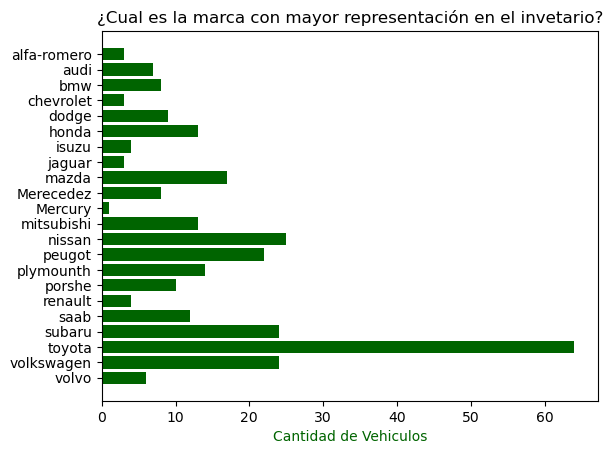

In [56]:

marcas = ("alfa-romero", "audi", "bmw","chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "Merecedez", "Mercury",
        "mitsubishi", "nissan", "peugot", "plymounth", "porshe", 'renault',"saab", "subaru", "toyota", "volkswagen", "volvo")

eje_y = gf1['cantidad'].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(marcas))

ax.barh(y_pos, eje_y, align='center',height=0.8, color= "#006400", alpha=1)

ax.set_yticks(y_pos, labels=marcas)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad de Vehiculos').set_color("#006400")
ax.set_title('¿Cual es la marca con mayor representación en el invetario?')

plt.show()


In [58]:

#Agrupar las observaciones segun marca de vehiculo.
gf2 = df_autos.groupby(['horsepower-bins']).count()
gf2 = gf2.iloc[:,:1]
gf2

,symboling
horsepower-bins,
pequeno,233
mediano,54
grande,7


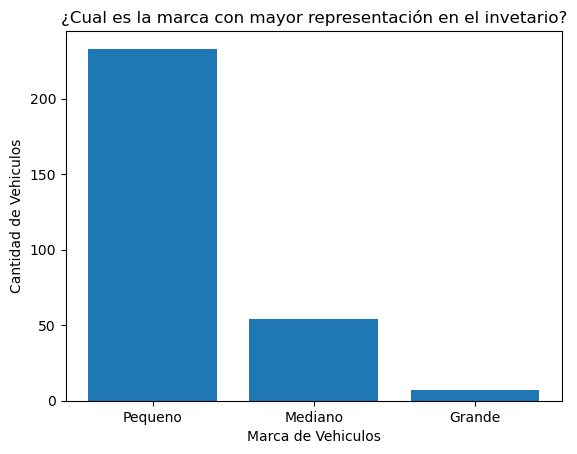

In [59]:

marcas = ("Pequeno", "Mediano","Grande")
eje_y = gf2['symboling'].tolist()
#Creamos la grafica
plt.bar(marcas, eje_y)
#Leyenda del eje y
plt.ylabel("Cantidad de Vehiculos")
##Leyenda en el eje x
plt.xlabel("Marca de Vehiculos")
##Titulo del Grafico
plt.title('¿Cual es la marca con mayor representación en el invetario?')
plt.show()



In [60]:
gf3 = df_autos.groupby(['style']).count()
gf3 = gf3.iloc[:,:1]
gf3

,symboling
style,
convertible,9
hardtop,13
hatchback,101
sedan,131
wagon,40


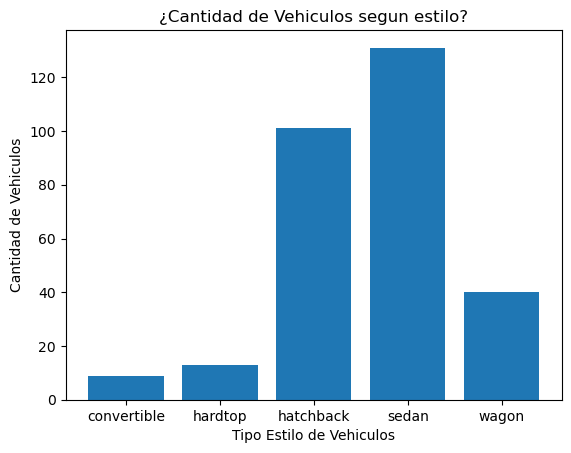

In [61]:
style = ("convertible", "hardtop","hatchback","sedan","wagon")
eje_y = gf3['symboling'].tolist()

#Creamos la grafica
plt.bar(style, eje_y)

#Leyenda del eje y
plt.ylabel("Cantidad de Vehiculos")

##Leyenda en el eje x
plt.xlabel("Tipo Estilo de Vehiculos")

##Titulo del Grafico
plt.title('¿Cantidad de Vehiculos segun estilo?')

plt.show()


In [62]:
#Agrupar las observaciones segun marca de vehiculo.
gf3 = df_autos.groupby(['style']).count()
gf3 = gf3.iloc[:,:1]

#Codigo para ordenar los valores ascendente y desendente
#gf3 = gf3.sort_values('symboling') #Ordena de Menor a Mayor
#gf3 = gf3.sort_values('symboling',ascending=False) #Ordena de Mayor a Menor
gf3

,symboling
style,
convertible,9
hardtop,13
hatchback,101
sedan,131
wagon,40


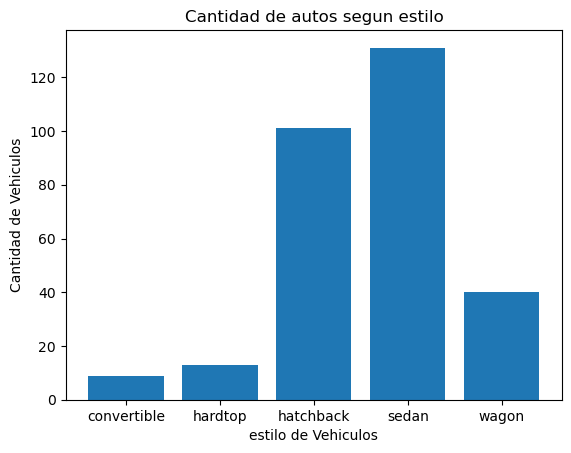

In [63]:

#Codigo para obtener la lista del indice del DataFrame
eje_x = gf3.index.tolist()
eje_y = gf3['symboling'].tolist()
#Creamos la grafica
plt.bar(eje_x, eje_y)
#Leyenda del eje y
plt.ylabel("Cantidad de Vehiculos")
##Leyenda en el eje x
plt.xlabel("estilo de Vehiculos")
##Titulo del Grafico
plt.title('Cantidad de autos segun estilo')
plt.show()



In [75]:
gf4 = df_autos.groupby(['aspiration']).count()
gf4 = gf4.iloc[:,:1]
gf4

,symboling
aspiration,
std,246
turbo,48


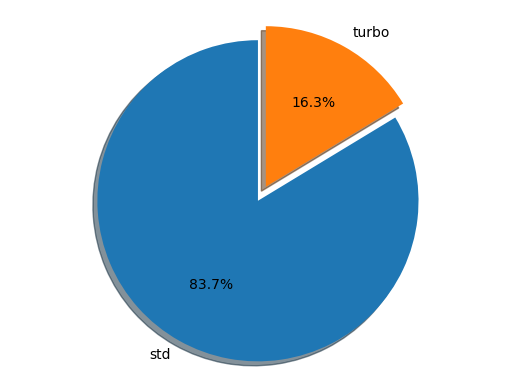

In [76]:
etiquetas = gf4.index.tolist()
sizes = gf4["symboling"].tolist()
 
separacion = (0, 0.1)  
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=separacion, labels=etiquetas, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
 
plt.show()



In [77]:
gf5 = df_autos.groupby(['style']).count()
gf5 = gf5.iloc[:,:1]
gf5

,symboling
style,
convertible,9
hardtop,13
hatchback,101
sedan,131
wagon,40


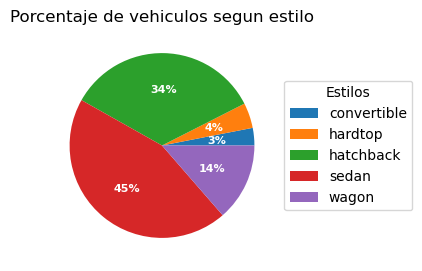

In [81]:
fig, ax = plt.subplots(figsize=(9, 3), subplot_kw=dict(aspect="equal"))
 
data = gf5['symboling'].tolist()
estilo = gf5.index.tolist()
 
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%".format(pct, absolute)
 

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
 
ax.legend(wedges, estilo,
          title="Estilos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts, size=8, weight="bold")
 
ax.set_title("Porcentaje de vehiculos segun estilo")
 
plt.show()

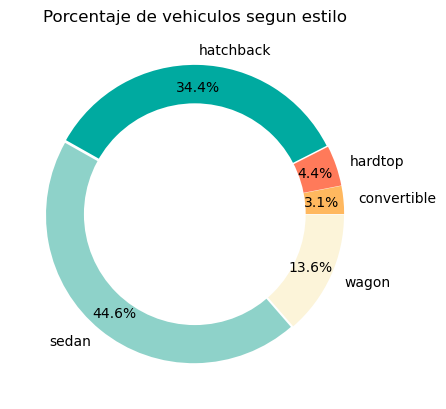

In [83]:
# Colores del grafico: FFB85F FF7A5A 00AAA0 8ED2C9 FCF4D9 
#https://www.colorcombos.com/color-schemes/7625/ColorCombo7625.html     pagina de colores
colores = ['#FFB85F', '#FF7A5A', '#00AAA0', '#8ED2C9', '#FCF4D9']
#Separaciones
separacion = (0.01,0.01,0.01,0.01,0.01)
#Creacion graficca circular
plt.pie(data, explode=separacion, labels=estilo, autopct='%1.1f%%',pctdistance=0.85, colors=colores)
 
#Dibujar Circulo Blanco
circulo = plt.Circle((0,0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)
 
plt.title("Porcentaje de vehiculos segun estilo")
 
plt.show()

In [85]:
df_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km,horsepower-bins
0,0,3.33,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeno
1,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,mediano
2,0,3.43,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,mediano
3,0,3.43,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,mediano
4,3,3.43,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,mediano


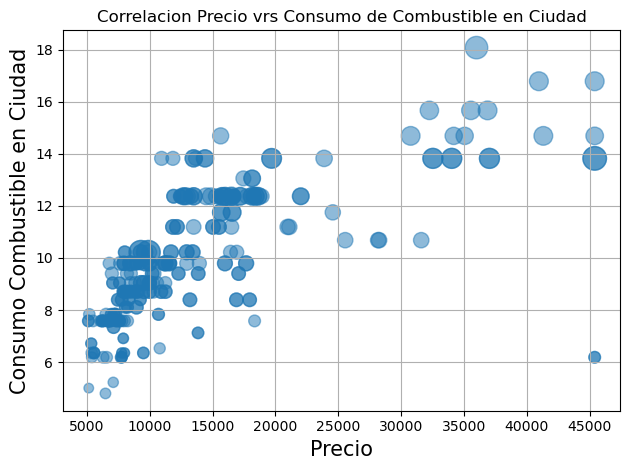

In [89]:
import matplotlib.cbook as cbook
 
fig, ax = plt.subplots()
ax.scatter(df_autos['price'], df_autos['city-L/100km'],s=df_autos['horsepower'], alpha=0.5)
#ax.scatter(df_Autos['price'], df_Autos['horsepower-bins'],alpha=0.5)
ax.set_xlabel("Precio", fontsize=15)
ax.set_ylabel("Consumo Combustible en Ciudad", fontsize=15)
ax.set_title('Correlacion Precio vrs Consumo de Combustible en Ciudad')
 
ax.grid(True)
fig.tight_layout()
 
plt.show()